In [3]:
!pip install keras

In [2]:
!pip install tensorflow
import tensorflow as tf


  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/93/21/9b035a4f823d6aee2917c75415be9a95861ff3d73a0a65e48edbf210cec1/tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.15.0 from https://files.pythonhosted.org/packages/4c/48/1a5a15517f18eaa4ff8d598b1c000300b20c1bb0e624539d702117a0c369/tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
     ---------------------------------------- 0.0/57.5 kB ? eta -:--:--
     ---------------------------------------- 0.0/

In [4]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

### Loading data

In [5]:
forest=pd.read_csv("forestfires.csv")

In [6]:
forest

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


### Checking for null values in the data

In [7]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

### There are no null values in the data

### Distributions of the independant features

<Axes: xlabel='area', ylabel='Density'>

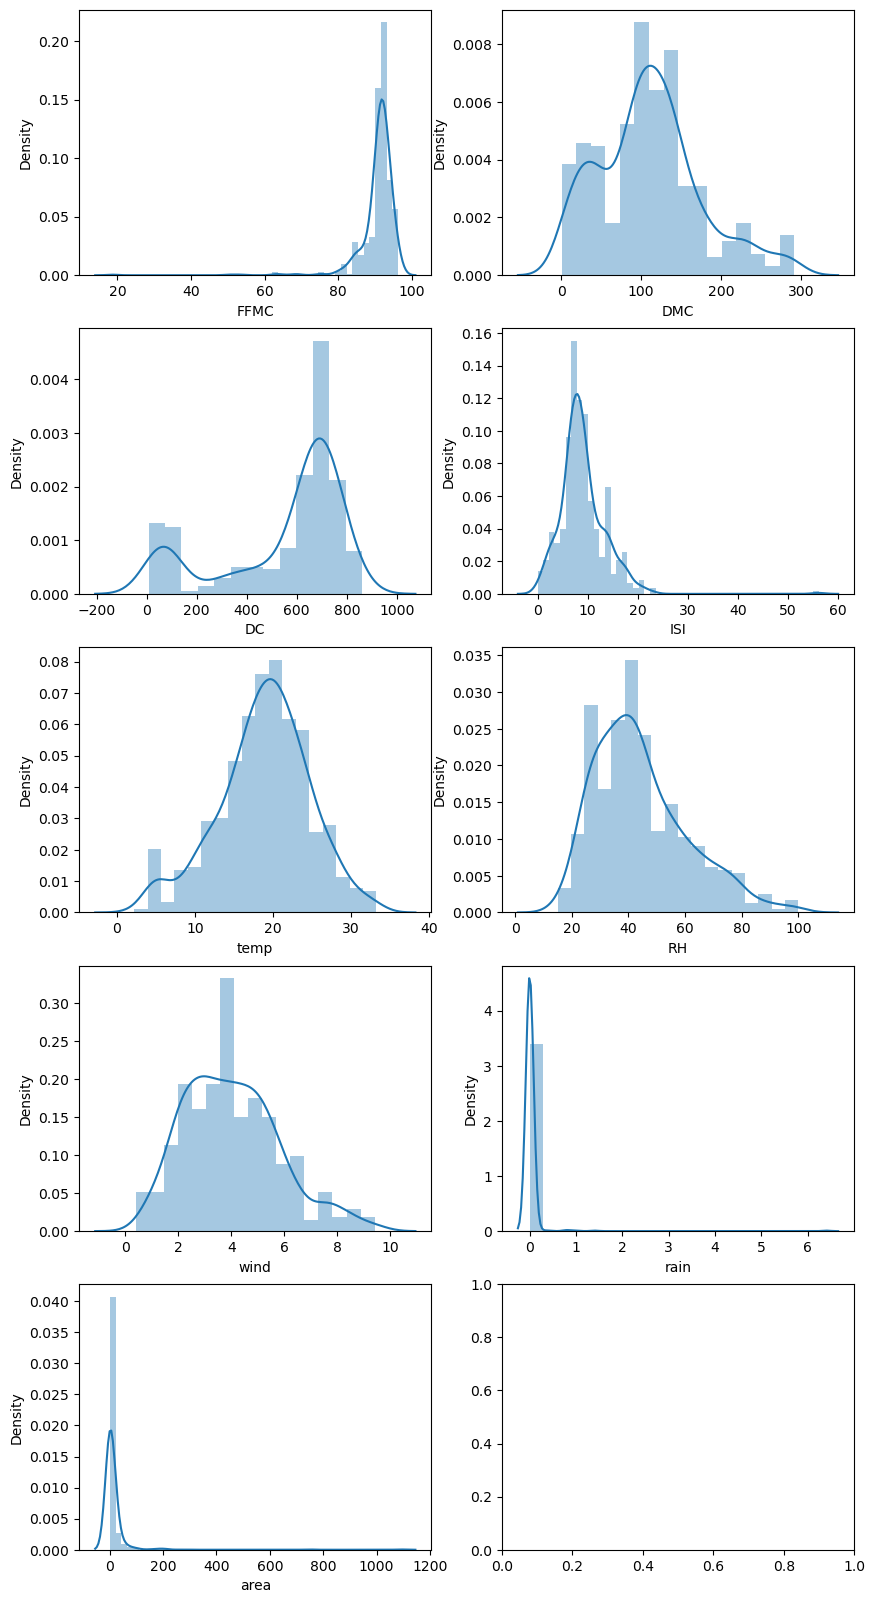

In [8]:
fig,axs=plt.subplots(5,2,figsize=(10,20))
sns.distplot(forest.FFMC,ax=axs[0,0])
sns.distplot(forest.DMC,ax=axs[0,1])
sns.distplot(forest.DC,ax=axs[1,0])
sns.distplot(forest.ISI,ax=axs[1,1])
sns.distplot(forest.temp,ax=axs[2,0])
sns.distplot(forest.RH,ax=axs[2,1])
sns.distplot(forest.wind,ax=axs[3,0])
sns.distplot(forest.rain,ax=axs[3,1])
sns.distplot(forest.area,ax=axs[4,0])

In [9]:
forest.size_category.value_counts()

size_category
small    378
large    139
Name: count, dtype: int64

### Label encoding the size category column

In [10]:
forest.loc[forest.size_category=='small','size_category']=0
forest.loc[forest.size_category=='large','size_category']=1

In [11]:
forest

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,0
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,0
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,0
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,0
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,1
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,1
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,1
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,0


### Dropping month and day columns since they are already present as dummy columns

In [12]:
forest.drop(['month','day'],axis=1,inplace=True)

In [13]:
forest

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,1
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,1
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,1
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


### Splitting dependant and independant variables

In [14]:
x=forest.iloc[:,:-1]
y=forest.iloc[:,-1]

In [15]:
y

0      0
1      0
2      0
3      0
4      0
      ..
512    1
513    1
514    1
515    0
516    0
Name: size_category, Length: 517, dtype: object

In [16]:
y=y.astype('float')

### Using standard scaler

In [17]:
ss=preprocessing.StandardScaler()

In [18]:
x=ss.fit_transform(x)

### Building model

In [19]:
model=Sequential()
model.add(Dense(28,  activation='relu'))
model.add(Dense(28,  activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [20]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
history=model.fit(x, y, validation_split=0.33, epochs=250, batch_size=50)

Epoch 1/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.6287 - loss: 0.6658 - val_accuracy: 0.6901 - val_loss: 0.6634
Epoch 2/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7026 - loss: 0.6102 - val_accuracy: 0.6842 - val_loss: 0.6645
Epoch 3/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7342 - loss: 0.5936 - val_accuracy: 0.6784 - val_loss: 0.6693
Epoch 4/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7700 - loss: 0.5652 - val_accuracy: 0.6784 - val_loss: 0.6760
Epoch 5/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7613 - loss: 0.5600 - val_accuracy: 0.6784 - val_loss: 0.6819
Epoch 6/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7501 - loss: 0.5508 - val_accuracy: 0.6784 - val_loss: 0.6857
Epoch 7/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7414 - loss: 0.5402 - val_accuracy: 0.6784 - val_loss: 0.6868
Epoch 8/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7389 - loss: 0.5391 - val_accuracy: 0.6784 - val_loss:

In [22]:
model.evaluate(x,y)

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9773 - loss: 0.1644 


[0.6976760625839233, 0.9187620878219604]

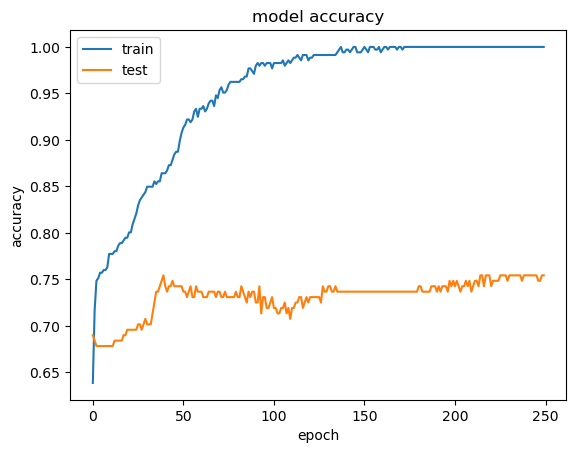

In [23]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### The model has low validation accuracy

### Building a new model with reduced number of hidden layer nodes

In [24]:
model2=Sequential()
model2.add(Dense(28,  activation='relu'))
model2.add(Dense(14,  activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model2.fit(x, y, validation_split=0.33, epochs=250, batch_size=50)

Epoch 1/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.5341 - loss: 0.7026 - val_accuracy: 0.5263 - val_loss: 0.7066
Epoch 2/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6341 - loss: 0.6569 - val_accuracy: 0.6023 - val_loss: 0.6897
Epoch 3/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7006 - loss: 0.6214 - val_accuracy: 0.6550 - val_loss: 0.6824
Epoch 4/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7379 - loss: 0.5903 - val_accuracy: 0.6784 - val_loss: 0.6814
Epoch 5/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7390 - loss: 0.6022 - val_accuracy: 0.6784 - val_loss: 0.6816
Epoch 6/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7572 - loss: 0.5561 - val_accuracy: 0.6784 - val_loss: 0.6832
Epoch 7/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7543 - loss: 0.5584 - val_accuracy: 0.6784 - val_loss: 0.6831
Epoch 8/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7910 - loss: 0.5107 - val_accuracy: 0.6784 - val_loss: 

In [25]:
model2.evaluate(x,y)

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9850 - loss: 0.1403 


[0.6725010871887207, 0.9497098922729492]

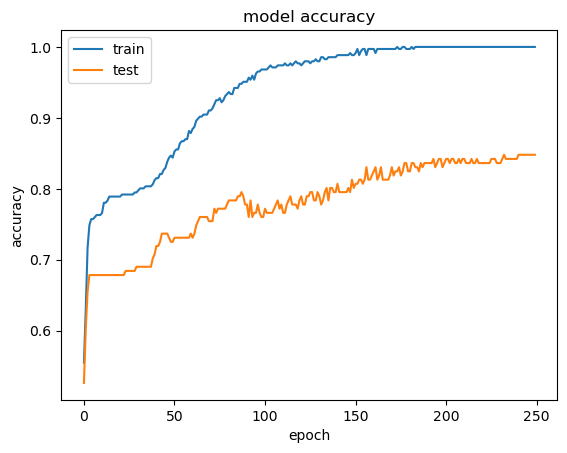

In [26]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Validation accuracy didnt improve

In [27]:
forest.columns

Index(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area',
       'dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed',
       'monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul',
       'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep',
       'size_category'],
      dtype='object')

### Dropping day dummy columns from the data 

In [28]:
x=forest.drop(['dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed','size_category'],axis=1)

In [29]:
y=y=forest.iloc[:,-1]

In [30]:
x

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,monthapr,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,0,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


### Building a new model for the new data

In [31]:
ss=preprocessing.StandardScaler()
x=ss.fit_transform(x)
y=y.astype('float')
model4=Sequential()
model4.add(Dense(21,  activation='relu'))
model4.add(Dense(15,  activation='relu'))
model4.add(Dense(1, activation='sigmoid'))
model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model4.fit(x, y, validation_split=0.33, epochs=250, batch_size=50)

Epoch 1/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.6117 - loss: 0.6546 - val_accuracy: 0.5965 - val_loss: 0.6938
Epoch 2/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6803 - loss: 0.6224 - val_accuracy: 0.6608 - val_loss: 0.6823
Epoch 3/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7800 - loss: 0.6085 - val_accuracy: 0.6842 - val_loss: 0.6736
Epoch 4/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7896 - loss: 0.5735 - val_accuracy: 0.6784 - val_loss: 0.6679
Epoch 5/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7856 - loss: 0.5647 - val_accuracy: 0.6842 - val_loss: 0.6618
Epoch 6/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8093 - loss: 0.5546 - val_accuracy: 0.6842 - val_loss: 0.6570
Epoch 7/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8102 - loss: 0.5311 - val_accuracy: 0.6842 - val_loss: 0.6527
Epoch 8/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7809 - loss: 0.5375 - val_accuracy: 0.6901 - val_loss:

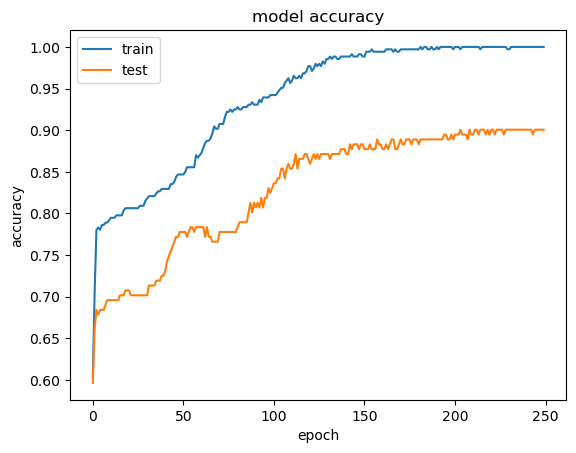

In [32]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### From the graph it can be inferred that the validation accuracy improved to 0.91

### So model4 is taken as the final model

In [33]:
model_final=model4

In [34]:
model_final

<Sequential name=sequential_2, built=True>